In [24]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None) # remove annoying warnings
pd.set_option('display.max_columns', None) # dunno why harus kyk gini

In [25]:
df = pd.read_csv("houses.csv")
df.head()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,Developer,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",-,-,-,Service Residence,2,-,Non Bumi Lot,VE,30338,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",-,-,-,Apartment,1,Low,Non Bumi Lot,E,30812,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,-,-,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",-,-,-,Flat,1,-,Non Bumi Lot,E,11584,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",-,43,956,Studio,-,Low,Bumi Lot,E,31916,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             4000 non-null   object
 1   Bedroom                 4000 non-null   object
 2   Bathroom                4000 non-null   object
 3   Property Size           4000 non-null   object
 4   Nearby School           687 non-null    object
 5   Nearby Mall             365 non-null    object
 6   Ad List                 4000 non-null   int64 
 7   Category                4000 non-null   object
 8   Facilities              4000 non-null   object
 9   Building Name           4000 non-null   object
 10  Developer               4000 non-null   object
 11  Tenure Type             4000 non-null   object
 12  Address                 4000 non-null   object
 13  Completion Year         4000 non-null   object
 14  # of Floors             4000 non-null   object
 15  Tota

In [27]:
important_cols= ['Property Size', 'Bedroom', 'Bathroom', '# of Floors', 'Total Units', 'Parking Lot', 'price']

filtered_df = df[important_cols]
filtered_df.columns

Index(['Property Size', 'Bedroom', 'Bathroom', '# of Floors', 'Total Units',
       'Parking Lot', 'price'],
      dtype='object')

In [28]:
filtered_df.head()

,Property Size,Bedroom,Bathroom,# of Floors,Total Units,Parking Lot,price
0,1000 sq.ft.,4,2,-,-,2,RM 340 000
1,980 sq.ft.,3,2,-,-,1,RM 250 000
2,1000 sq.ft.,3,2,13,445,1,RM 230 000
3,592 sq.ft.,3,1,-,-,1,RM 158 000
4,467 sq.ft.,1,1,43,956,-,RM 305 000


In [29]:
filtered_df['price'] = filtered_df['price'].str.replace('RM', '').str.replace(' ', '').str.strip().astype(int)

In [30]:
filtered_df.replace("-", np.nan, inplace=True)

In [31]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property Size  4000 non-null   object
 1   Bedroom        3999 non-null   object
 2   Bathroom       3999 non-null   object
 3   # of Floors    2251 non-null   object
 4   Total Units    2098 non-null   object
 5   Parking Lot    2781 non-null   object
 6   price          4000 non-null   int32 
dtypes: int32(1), object(6)
memory usage: 203.3+ KB


In [32]:
filtered_df["Property Size"] = filtered_df["Property Size"].str.replace(' sq.ft.', '').astype(int)

In [33]:
filtered_df["# of Floors"].unique()

array([nan, '13', '43', '19', '5', '12', '435', '18', '24', '10', '33',
       '44', '17', '25', '4', '35', '26', '29', '21', '30', '41', '16',
       '15', '42', '22', '23', '20', '27', '38', '31', '9', '8', '11',
       '14', '34', '32', '6', '28', '40', '55', '486', '49', '60', '46',
       '37', '7', '36', '2', '45', '3', '63', '39', '48', '58', '50',
       '135', '47', '500', '56', '504', '52'], dtype=object)

In [34]:
filtered_df["Bathroom"] = filtered_df["Bathroom"].astype(float)
filtered_df["Bathroom"].fillna(int(filtered_df["Bathroom"].mean()), inplace=True)
filtered_df["Bedroom"] = filtered_df["Bedroom"].astype(float)
filtered_df["Bedroom"].fillna(int(filtered_df["Bedroom"].mean()), inplace=True)
filtered_df["Total Units"] = filtered_df["Total Units"].astype(float)
filtered_df["Total Units"].fillna(int(filtered_df["Total Units"].mean()), inplace=True)
filtered_df["# of Floors"] = filtered_df["# of Floors"].astype(float)
filtered_df["# of Floors"].fillna(int(filtered_df["# of Floors"].mean()), inplace=True)
filtered_df["Parking Lot"] = filtered_df["Parking Lot"].astype(float)
filtered_df["Parking Lot"].fillna(0, inplace=True)

In [35]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property Size  4000 non-null   int32  
 1   Bedroom        4000 non-null   float64
 2   Bathroom       4000 non-null   float64
 3   # of Floors    4000 non-null   float64
 4   Total Units    4000 non-null   float64
 5   Parking Lot    4000 non-null   float64
 6   price          4000 non-null   int32  
dtypes: float64(5), int32(2)
memory usage: 187.6 KB


In [36]:
summary_stats = filtered_df.describe()
summary_stats

,Property Size,Bedroom,Bathroom,# of Floors,Total Units,Parking Lot,price
count,4000.000000,4000.000000,4000.000000,4000.0000,4000.000000,4000.000000,4.000000e+03
mean,1035.049000,2.917000,2.019750,21.3660,614.002750,1.047500,4.218269e+05
std,2012.250439,0.691904,0.607414,19.3495,428.476878,0.906614,3.286249e+05
min,1.000000,1.000000,1.000000,2.0000,1.000000,0.000000,3.800000e+04
25%,750.000000,3.000000,2.000000,18.0000,450.000000,0.000000,2.500000e+05
50%,900.000000,3.000000,2.000000,21.0000,614.000000,1.000000,3.500000e+05
75%,1120.000000,3.000000,2.000000,21.0000,614.000000,2.000000,4.900000e+05
max,122774.000000,10.000000,8.000000,504.0000,7810.000000,10.000000,6.016000e+06


In [37]:
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

# Potential outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display potential outliers
potential_outliers = (filtered_df < lower_bound) | (filtered_df > upper_bound)
print(potential_outliers.sum())

Property Size     173
Bedroom          1074
Bathroom          874
# of Floors      1264
Total Units       715
Parking Lot         5
price             229
dtype: int64


In [38]:
final_df = filtered_df[filtered_df["Property Size"] <= 1200]
final_df = final_df[final_df["# of Floors"] <= 100]
final_df = final_df[final_df["Total Units"] <= 2000]
final_df = final_df[final_df["price"] <= 4.9e+05]

<Axes: xlabel='Property Size', ylabel='price'>

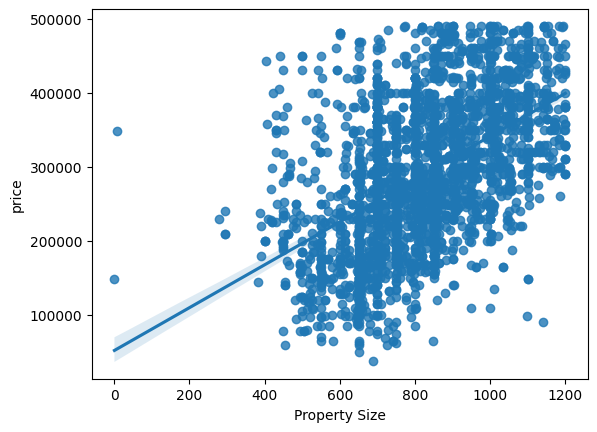

In [39]:
import seaborn as sns
sns.regplot(data=final_df, x="Property Size", y="price")

<Axes: xlabel='Bathroom', ylabel='price'>

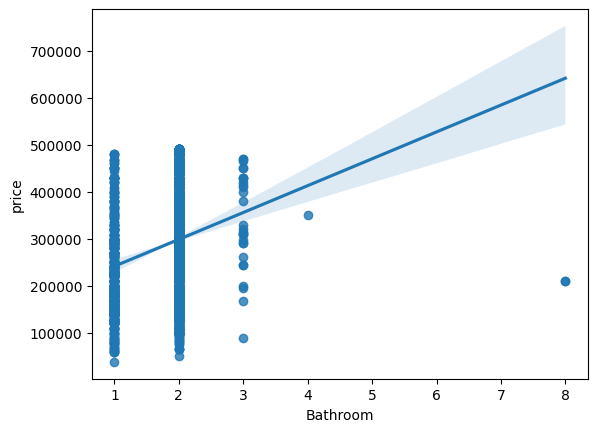

In [40]:
sns.regplot(data=final_df, x="Bathroom", y="price")

<Axes: xlabel='Bedroom', ylabel='price'>

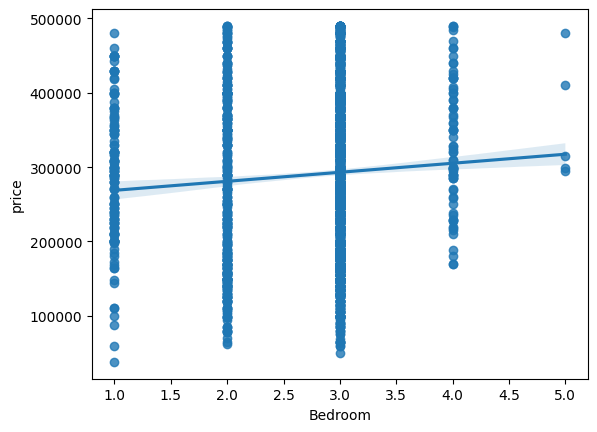

In [41]:
sns.regplot(data=final_df, x="Bedroom", y="price")

<Axes: xlabel='# of Floors', ylabel='price'>

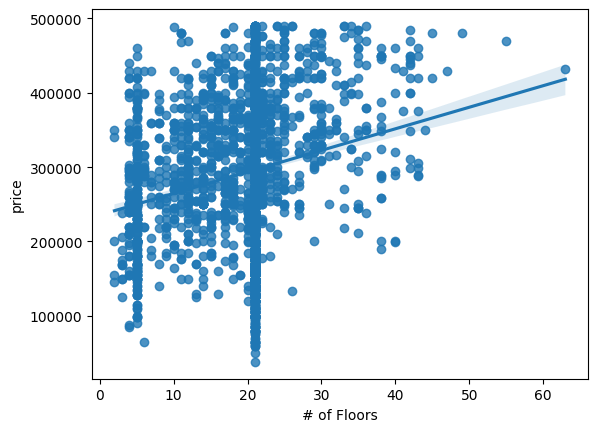

In [42]:
sns.regplot(data=final_df, x="# of Floors", y="price")

<Axes: xlabel='Total Units', ylabel='price'>

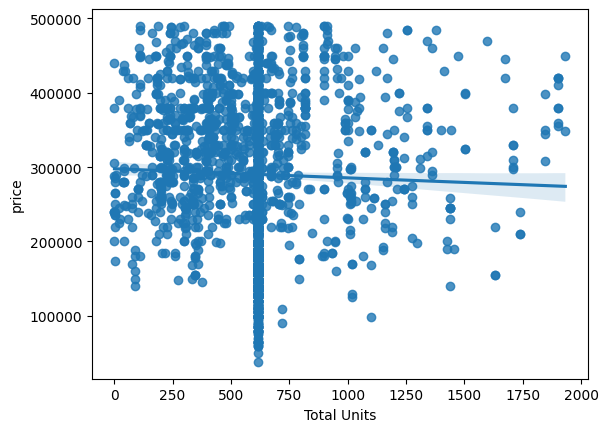

In [43]:
sns.regplot(data=final_df, x="Total Units", y="price")

In [44]:
final_df.columns

Index(['Property Size', 'Bedroom', 'Bathroom', '# of Floors', 'Total Units',
       'Parking Lot', 'price'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR

X = final_df.drop('price', axis=1)
y = final_df['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
]
ensemble_model = VotingRegressor(estimators=models)
ensemble_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
y_val_pred = ensemble_model.predict(X_val)

In [ ]:
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse / 1e6:.6f} (scaled down by 1e6)')

Mean Squared Error on Validation Set: 3635.833589 (scaled down by 1e6)


In [ ]:
y_test_pred = ensemble_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test / 1e6:.6f} (scaled down by 1e6)')

Mean Squared Error on Test Set: 4581.058112 (scaled down by 1e6)


# Heading 1
## Heading 2
### Heading 3

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from geopy.geocoders import Nominatim

# Task 1: Changing 'Completion Year' into 'Age of Unit'
current_year = datetime.now().year
df['Age of Unit'] = current_year - df['Completion Year']

# Task 2: Convert 'Facilities' from Categorical to Numerical Data (One-Hot Encoding)
encoder = OneHotEncoder(sparse=False, drop='first')
facilities_encoded = encoder.fit_transform(df[['Facilities']])
df_facilities_encoded = pd.DataFrame(facilities_encoded, columns=encoder.get_feature_names_out(['Facilities']))
df = pd.concat([df, df_facilities_encoded], axis=1)

# Task 3: Converting Nearby Facilities
nearby_facilities = ['Railway Station', 'Bus Stop', 'Highway', 'Mall', 'School', 'Hospital', 'Park']
for facility in nearby_facilities:
    df[f'Nearby {facility}'] = df['Facilities'].apply(lambda x: facility if facility in str(x) else None)

# Task 4: Extracting unique values from 'Property Type'
property_types = df['Property Type'].unique()

# Task 5: Extracting the unique values from 'Developer'
developers = df['Developer'].unique()

# Task 6: Extracting important details from Address using GeoPy
geolocator = Nominatim(user_agent="geo_locator")
df['Location'] = df['Address'].apply(lambda x: geolocator.geocode(x) if pd.notnull(x) else None)
df[['City', 'State', 'Area', 'Latitude', 'Longitude']] = pd.DataFrame(df['Location'].apply(lambda x: [x.address.split(', ')[-4], x.address.split(', ')[-3], x.address.split(', ')[-2] if len(x.address.split(', ')) >= 3 else None, x.latitude, x.longitude] if x else [None, None, None, None, None]).tolist(), index=df.index)

# Drop unnecessary columns
df.drop(['Completion Year', 'Facilities', 'Property Type', 'Developer', 'Address', 'Location'], axis=1, inplace=True)

# Display the modified DataFrame
print(df.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler

# Assuming 'final_df' is your DataFrame with the housing data

# Split the data
X = final_df.drop('price', axis=1)
y = final_df['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features for algorithms that benefit from it (e.g., KNN, Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Models
models = [
    ('lr', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
]

# Ensemble model
ensemble_model = VotingRegressor(estimators=models)
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_val_pred = ensemble_model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse_val}')

# If satisfied with the performance, you can use the ensemble_model for further predictions.
